# Signal Analysis

This notebook is intended for a first qualitative investigation of audio recordings.<br>
It includes:
* Playback of the audio signal
* General information 
* Plots
    * waveform
    * spectogram
    
It can also be extended by further analysis steps.

&ensp;

In [5]:
### Import packages
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import simsalabim as sim
import IPython.display as ipd
import librosa
import librosa.display

#import scipy.io.wavfile as wavfile
#import scipy.fft as fft
#from scipy import signal 

In [81]:
### Import signal
this_path = Path.cwd().parent
data_path = this_path / 'data' / 'tmp'
result_path = this_path / 'data' / 'tmp'
result_file = 'NR_Optimization_analysis.csv'

files_wav = list(data_path.glob('**/*.wav'))

print(f"Files in folder {data_path}:\n------")
for idx, val in enumerate(files_wav):
    print("{:<3}{:}".format(idx, val.name))

Files in folder C:\Users\klein\Documents\1_Code\data\tmp:
------
0  Impulses_RattlingDishes.wav
1  Imp_INR_off_onTh2_offTh2_ratio4_absTh30_single.wav


 &nbsp;

In [82]:
# Loading multiple files to a list of Signals
wav_data = []
for file in files_wav:
    tmp_data, tmp_sr = librosa.load(test_file, sr=None)
    wav_data.append(sim.Signal(tmp_data, tmp_sr, comment=f"{file.name}", dtype=tmp_data.dtype))

&ensp;
## 1. Listening and general information
* Load a single file, print its information and create the audio player
* The use of __[librosa.load](https://librosa.org/doc/main/core.html#audio-loading)__ is prefered to __[scipy.io.wavfile.read](https://docs.scipy.org/doc/scipy/reference/io.html#module-scipy.io.wavfile)__, beacause the latter does not support all variants of the wav format. For example,  24 -bit integer WAV-files are not allowed. Furthermore, certain metadata fields in a wav file may also lead to errors. See __[here](https://www.audiolabs-erlangen.de/resources/MIR/FMP/B/B_PythonAudio.html#SciPy)__.

In [83]:
# Handling single file e.g. for listening/plotting
test_file = files_wav[0]
test_data, sampling_rate = librosa.load(test_file, sr=22050)
test_sig = sim.Signal(test_data, sampling_rate, comment=f"{test_file.name}")
print(test_sig)
ipd.Audio(test_file)

Signal: Impulses_RattlingDishes.wav
Audio signal with 213897 samples @ 22050 Hz sampling rate



&ensp;
## 2. Plots
* Own plotting routine to inspect waveform and spectogram 
* All ploting routines are based on __[librosa.display](https://librosa.org/doc/main/display.html#data-visualization)__ and __[matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html)__
* For further explanation on parameters refer to the __[librosa documentation](https://librosa.org/doc/main/glossary.html)__

<div class="alert alert-block alert-info">
<b>Note:</b> Switch from librosa.display.waveshow to a more low-level implementation based purely on matplotlib.
    Export common plots as functions.
</div>
<div class="alert alert-block alert-info">
<b>Note:</b> Export common plots as dedicated functions.
</div>

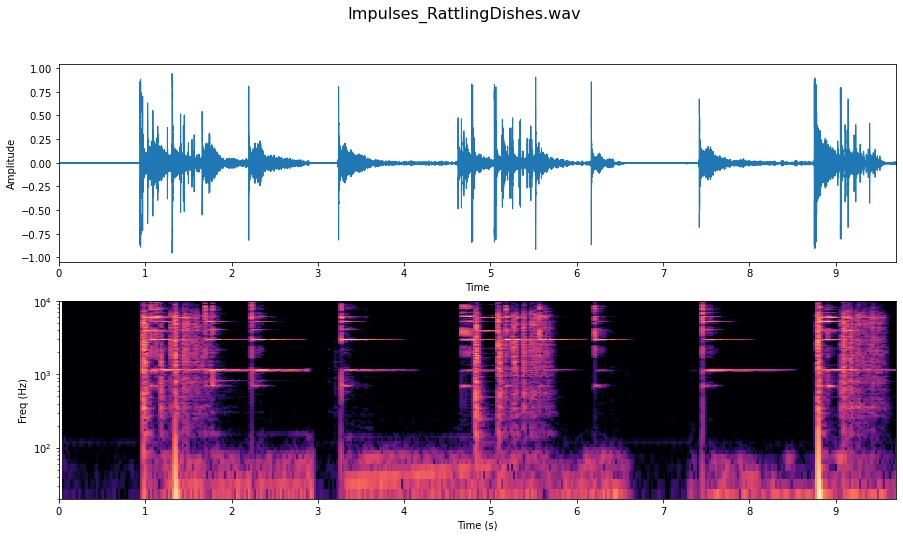

In [68]:
sr = test_sig.sampling_rate
x = test_sig.data.astype('float32')
dt = 1 / test_sig.sampling_rate
t = np.arange(0, test_sig.duration, dt)
n_fft = 2048
hop_length = 512

# compute stft
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))

# get frequency bins
freq = np.fft.rfftfreq(n=n_fft, d=1.0 / sr)

# frames to samples to time 
# (maybe start with samples from x instead Xdb)
frames = np.arange(Xdb.shape[1])
offset = int(n_fft // 2)
samples = (np.asanyarray(frames) * hop_length + offset).astype(int)
times = np.asanyarray(samples) / float(sr)

# do plotting
%matplotlib inline

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
fig.suptitle('{}'.format(test_file.name), fontsize=16)
freqLimits = (20, 10000)

# waveform
librosa.display.waveshow(x, sr=sr, ax=axs[0])
axs[0].set_xlim(t[0], t[-1])
axs[0].set_ylabel('Amplitude')

# spectogram
plt.pcolormesh(times, freq, Xdb, cmap='magma')
#fig.subplots_adjust(right=0.95)
#cax = fig.add_axes([0.975, 0.15, 0.02, 0.7])
#plt.colorbar(cax=cax)
axs[1].sharex(axs[0])
axs[1].set_ylabel('Freq (Hz)')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylim(freqLimits)
axs[1].set_yscale('log')

# todo: longterm spectrum?

#plt.tight_layout()
plt.show()